In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # A. Data Collecting

In [2]:
data = pd.read_excel("/content/transposed.xlsx")

# # B. Data Description

## Data and File Description

  Data yang digunakan merupakan rangkaian beberapa dataset yang menyatakan berbagai detail terkait dengan perolehan, pengguna, dan perkembangan berbagai layanan dari perusahaan Telkomsel per kuarter dari 2000 sampai 2020. 

File data tersedia dalam format xlsx dengan ukuran 102 KB. Data tersebut didapatkan dari GSMA Intelligence, diberikan salah seorang orang tua anggota kelompok kepada kami.

 Data yang digunakan awalnya berdimensi 84 x 179. Namun, akibat banyaknya atribut yang menjelaskan dataset berbagai yang beragam, kami memutuskan untuk membatasi analisis menjadi 7 atribut pertama (5 dataset pertama). Karena itu, data yang akan dianalisis berdimensi 84 x 7.

## Karakteristik Data

### Quarter

Atribut kategorikal nominal yang menjelaskan baris data tersebut berasal dari kuartal berapa

#### Kategori dalam atribut

In [3]:
print(len(data["Quarter"].unique()))
data["Quarter"].unique().tolist()

4


[1, 2, 3, 4]

### Year

Atribut kategorikal nominal, menunjukkan asal tahun baris data tersebut

#### Kategori dalam atribut

In [4]:
print(len(data["Year"].unique()))
data["Year"].unique().tolist()

21


[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

### Percentage Prepaid Connections

Atribut kuantitatif, menjelaskan persentase pengguna layanan prabayar dari total pelanggan

#### Range

In [5]:
max_ = data['Percentage prepaid connections'].max()
min_ = data['Percentage prepaid connections'].min()
print('maximum =', max_)
print('minimum =', min_)
print('range =', max_-min_)

maximum = 0.9828
minimum = 0.5285
range = 0.45430000000000004


#### Persentase data yang kosong

In [6]:
null_ = data['Percentage prepaid connections'].isna().sum()
percentage_ = 100*(null_/ len(data))
print('Jumlah data yang kosong =', null_)
print('persen =', percentage_)

Jumlah data yang kosong = 1
persen = 1.1904761904761905


### Percentage Contract Connections

Atribut kuantitatif, menjelaskan persentase pengguna layanan kontrak dari total pelanggan

#### Range

In [7]:
max_ = data['Percentage contract connections'].max()
min_ = data['Percentage contract connections'].min()
print('maximum =', max_)
print('minimum =', min_)
print('range =', max_-min_)

maximum = 0.4715
minimum = 0.0172
range = 0.4543


#### Persentase data yang kosong

In [8]:
null_ = data['Percentage contract connections'].isna().sum()
percentage_ = 100*(null_/ len(data))
print('Jumlah data yang kosong =', null_)
print('persen =', percentage_)

Jumlah data yang kosong = 1
persen = 1.1904761904761905


### Percentage 2G Connections

Atribut kuantitatif, menjelaskan persentase pelanggan yang mengggunakan koneksi 2G dari total pelanggan

#### Range

In [9]:
max_ = data['Percentage 2G connections'].max()
min_ = data['Percentage 2G connections'].min()
print('maximum =', max_)
print('minimum =', min_)
print('range =', max_-min_)

maximum = 1.0
minimum = 0.0251
range = 0.9749


#### Persentase data yang kosong

In [10]:
null_ = data['Percentage 2G connections'].isna().sum()
percentage_ = 100*(null_/ len(data))
print('Jumlah data yang kosong =', null_)
print('persen =', percentage_)

Jumlah data yang kosong = 1
persen = 1.1904761904761905


### Percentage 3G Connections

Atribut kuantitatif, menjelaskan persentase pelanggan yang mengggunakan koneksi 3G dari total pelanggan

#### Range

In [11]:
max_ = data['Percentage 3G connections'].max()
min_ = data['Percentage 3G connections'].min()
print('maximum =', max_)
print('minimum =', min_)
print('range =', max_-min_)

maximum = 0.48
minimum = 0.0002
range = 0.4798


#### Persentase data yang kosong

In [12]:
null_ = data['Percentage 3G connections'].isna().sum()
percentage_ = 100*(null_/ len(data))
print('Jumlah data yang kosong =', null_)
print('persen =', percentage_)

Jumlah data yang kosong = 27
persen = 32.142857142857146


### Percentage 4G Connections

Atribut kuantitatif, menjelaskan persentase pelanggan yang mengggunakan koneksi 4G dari total pelanggan

#### Range

In [13]:
max_ = data['Percentage 4G connections'].max()
min_ = data['Percentage 4G connections'].min()
print('maximum =', max_)
print('minimum =', min_)
print('range =', max_-min_)

maximum = 0.5565
minimum = 0.0004
range = 0.5561


#### Persentase data yang kosong

In [14]:
null_ = data['Percentage 4G connections'].isna().sum()
percentage_ = 100*(null_/ len(data))
print('Jumlah data yang kosong =', null_)
print('persen =', percentage_)

Jumlah data yang kosong = 60
persen = 71.42857142857143


# # C. Data Preprocessing (Data Cleansing)

#### Kondisi data sebelum di hapus beberapa kolomnya

In [15]:
data

,Quarter,Year,Percentage prepaid connections,Percentage contract connections,Percentage 2G connections,Percentage 3G connections,Percentage 4G connections,Percentage mobile broadband capable connections,Percentage smartphone connections,Percentage basic/feature phone connections,Percentage mobile data-only device connections,Prepaid % recurring revenue; cellular,Contract % recurring revenue; cellular,Voice % recurring revenue; cellular,Interconnection % recurring revenue; cellular,Roaming % recurring revenue; cellular,Non-voice % recurring revenue; cellular,Data % recurring revenue; cellular,Messaging % recurring revenue; cellular,VAS % recurring revenue; cellular,ARPU; by mobile connection,Prepaid ARPU; by mobile connection,Contract ARPU; by mobile connection,Voice ARPU; by mobile connection,Roaming ARPU; by mobile connection,Non-voice ARPU; by mobile connection,Data ARPU; by mobile connection,Messaging ARPU; by mobile connection,VAS ARPU; by mobile connection,Total Base stations,2G Base stations,3G Base stations,4G Base stations,Total Capex,Annual capex/revenue; cellular,Total cellular connections,Total mobile connections,Prepaid mobile connections,Contract mobile connections,2G connections,...,Net additions of 4G connections,Net additions of mobile broadband capable connections,Net additions of smartphone connections,Net additions of basic/feature phone connections,Net additions of mobile data-only device connections,Net additions of GSM connections,Net additions of WCDMA (Family) connections,Net additions of LTE (Family) connections,Net additions of licensed cellular IoT connections,Net additions of cellular M2M connections,Net additions of LPWA connections,Total net profit; cellular,Total cellular network coverage; by population,3G network coverage; by population,4G network coverage; by population,Total Operating free cash flow; cellular,Total opex; cellular,Cost of Sales opex; cellular,Cost of Services opex; cellular,SG&A opex; cellular,Personnel opex; cellular,Selling & Marketing opex; cellular,Administration opex; cellular,Other opex; cellular,Total Opex/revenue; annual; cellular,Total revenue; cellular,Recurring revenue; cellular,Prepaid revenue; cellular,Contract revenue; cellular,Voice revenue; cellular,Interconnection revenue; cellular,Roaming revenue; cellular,Non-voice revenue; cellular,Data revenue; cellular,Messaging revenue; cellular,VAS revenue; cellular,Non-Recurring revenue; cellular,Equipment revenue; cellular,Total SMS messages,SMS messages; per connection
0,1,2000,0.5285,0.4715,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.17,7.00,19.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1121451.0,592684.0,528767.0,1121451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.299560e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.297519e+07,4.092924e+07,1.351743e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.045952e+06,NaN,NaN,NaN
1,2,2000,0.5577,0.4423,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.17,7.00,19.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1285560.0,716977.0,568583.0,1285560.0,...,NaN,NaN,NaN,NaN,NaN,164109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.299560e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.673166e+07,4.392395e+07,1.351743e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.807706e+06,NaN,NaN,NaN
2,3,2000,0.5782,0.4218,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.17,7.00,19.10,NaN,NaN,NaN,NaN,NaN,NaN,1331.0,NaN,NaN,NaN,NaN,NaN,NaN,1449669.0,838271.0,611398.0,1449669.0,...,NaN,NaN,NaN,NaN,NaN,164109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.299560e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.299276e+07,4.991339e+07,1.351743e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.079378e+06,NaN,NaN,NaN
3,4,2000,0.6104,0.3896,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.17,7.00,19.10,NaN,NaN,NaN,NaN,NaN,NaN,1411.0,NaN,NaN,NaN,NaN,NaN,NaN,1687339.0,1029903.0,657436.0,1687339.0,...,NaN,NaN,NaN,NaN,NaN,237670.0,NaN,NaN,NaN,

#### Menghapus attribut yang tidak diperlukan

In [16]:
dropped = [0 for i in range(172)]
j = 7
for i in range(172):   
  dropped[i] = j
  j += 1
data.drop(data.columns[dropped], axis=1, inplace=True)

#### Kondisi data setelah dihapus beberapa kolom

In [17]:
data

,Quarter,Year,Percentage prepaid connections,Percentage contract connections,Percentage 2G connections,Percentage 3G connections,Percentage 4G connections
0,1,2000,0.5285,0.4715,1.0000,NaN,NaN
1,2,2000,0.5577,0.4423,1.0000,NaN,NaN
2,3,2000,0.5782,0.4218,1.0000,NaN,NaN
3,4,2000,0.6104,0.3896,1.0000,NaN,NaN
4,1,2001,0.6339,0.3661,1.0000,NaN,NaN
...,...,...,...,...,...,...,...
79,4,2019,0.9627,0.0373,0.1020,0.4352,0.4628
80,1,2020,0.9604,0.0396,0.0311,0.4507,0.5182
81,2,2020,0.9609,0.0391,0.0251,0.4184,0.5565
82,3,2020,0.9629,0.0371,0.0484,0.4013,0.5503


#### Mengecek nama variable columns

In [18]:
data.columns

Index(['Quarter', 'Year', 'Percentage prepaid connections',
       'Percentage contract connections', 'Percentage 2G connections',
       'Percentage 3G connections', 'Percentage 4G connections'],
      dtype='object')

#### Mengubah nama-nama variables collumn menjadi tidak ada spasi

In [19]:
data.columns = ["quarter","year","percentage_prepaid_connections","percentage_contract_connections","percentage_2G_connections","percentage_3G_connections","percentage_4G_connections"]

In [20]:
data.columns

Index(['quarter', 'year', 'percentage_prepaid_connections',
       'percentage_contract_connections', 'percentage_2G_connections',
       'percentage_3G_connections', 'percentage_4G_connections'],
      dtype='object')

In [21]:
data

,quarter,year,percentage_prepaid_connections,percentage_contract_connections,percentage_2G_connections,percentage_3G_connections,percentage_4G_connections
0,1,2000,0.5285,0.4715,1.0000,NaN,NaN
1,2,2000,0.5577,0.4423,1.0000,NaN,NaN
2,3,2000,0.5782,0.4218,1.0000,NaN,NaN
3,4,2000,0.6104,0.3896,1.0000,NaN,NaN
4,1,2001,0.6339,0.3661,1.0000,NaN,NaN
...,...,...,...,...,...,...,...
79,4,2019,0.9627,0.0373,0.1020,0.4352,0.4628
80,1,2020,0.9604,0.0396,0.0311,0.4507,0.5182
81,2,2020,0.9609,0.0391,0.0251,0.4184,0.5565
82,3,2020,0.9629,0.0371,0.0484,0.4013,0.5503


#### Mengubah nilai pada setiap cell percentage menjadi bilangan percentage skala 100%

Angka percentage di dalam cell data perlu dikalikan 100, karena ketika dioutputkan di ipynb angka tercovert menjadi dibagi 100

In [22]:
for i in range(84):
  # mengalikan 100 value dalam cell yang memiliki nilai pada kolom percentage_prepaid_connections
  if pd.isnull(data.loc[i, "percentage_prepaid_connections"]) == False:
    data.loc[i, "percentage_prepaid_connections"] = data.loc[i, "percentage_prepaid_connections"] * 100
  
  # mengalikan 100 value dalam cell yang memiliki nilai pada kolom percentage_contract_connections
  if pd.isnull(data.loc[i, "percentage_contract_connections"]) == False:
    data.loc[i, "percentage_contract_connections"] = data.loc[i, "percentage_contract_connections"] * 100
  
  # mengalikan 100 value dalam cell yang memiliki nilai pada kolom percentage_2G_connections
  if pd.isnull(data.loc[i, "percentage_2G_connections"]) == False:
    data.loc[i, "percentage_2G_connections"] = data.loc[i, "percentage_2G_connections"] * 100
  
  # mengalikan 100 value dalam cell yang memiliki nilai pada kolom percentage_3G_connections
  if pd.isnull(data.loc[i, "percentage_3G_connections"]) == False:
    data.loc[i, "percentage_3G_connections"] = data.loc[i, "percentage_3G_connections"] * 100
  
  # mengalikan 100 value dalam cell yang memiliki nilai pada kolom percentage_4G_connections
  if pd.isnull(data.loc[i, "percentage_4G_connections"]) == False:
    data.loc[i, "percentage_4G_connections"] = data.loc[i, "percentage_4G_connections"] * 100

#### Kondisi data setelah value dalam cell kolom percentage dikalikan 100

In [23]:
data

,quarter,year,percentage_prepaid_connections,percentage_contract_connections,percentage_2G_connections,percentage_3G_connections,percentage_4G_connections
0,1,2000,52.85,47.15,100.00,NaN,NaN
1,2,2000,55.77,44.23,100.00,NaN,NaN
2,3,2000,57.82,42.18,100.00,NaN,NaN
3,4,2000,61.04,38.96,100.00,NaN,NaN
4,1,2001,63.39,36.61,100.00,NaN,NaN
...,...,...,...,...,...,...,...
79,4,2019,96.27,3.73,10.20,43.52,46.28
80,1,2020,96.04,3.96,3.11,45.07,51.82
81,2,2020,96.09,3.91,2.51,41.84,55.65
82,3,2020,96.29,3.71,4.84,40.13,55.03


# # D. Data Observation (Statistic and Visualization)

## Statistik

### Sampel Data

#### Data pertama

In [24]:
data[0:1]

,quarter,year,percentage_prepaid_connections,percentage_contract_connections,percentage_2G_connections,percentage_3G_connections,percentage_4G_connections
0,1,2000,52.85,47.15,100.0,NaN,NaN


Pada sampel data pertama ini mengambil data line pertama pada dataset. Ada beberapa atribut yang belum ada nilainya, yaitu percentage_3G_connections dan percentage_4G_connections, dimana ini menjukkan pada waktu tersebut belum ada 3g dan 4g

#### Data pertama saat 4g mulai masuk dalam percantage

**Mencari index baris saat semua 2g 3g dan 4g sudah memiliki data (tidak ada yang NaN/Null)**

In [25]:
idx = 0 #sebagai index terbesar sementara
i = 0
while pd.isnull(data.loc[i,"percentage_4G_connections"]) == True: #loop untuk mengecek percentage 4g yang memiliki value NaN sampai menemukan cell yang tidak NaN
  i += 1

idx = i

i = 0
while pd.isnull(data.loc[i,"percentage_3G_connections"]) == True: #loop untuk mengecek percentage 3g yang memiliki value NaN sampai menemukan cell yang tidak NaN
  i += 1

if i > idx:
  idx = i

i = 0
while pd.isnull(data.loc[i,"percentage_2G_connections"]) == True: #loop untuk mengecek percentage 2g yang memiliki value NaN sampai menemukan cell yang tidak NaN
  i += 1

if i > idx:
  idx = i

**Menggunakan idx yang ditemukan untuk mengoutputkan data yang dicari**

In [26]:
data[idx:idx+1]

,quarter,year,percentage_prepaid_connections,percentage_contract_connections,percentage_2G_connections,percentage_3G_connections,percentage_4G_connections
59,4,2014,97.97,2.03,75.19,24.77,0.04


Semua data mulai tidak null berada pada index ke 59 dataset, (mulai pada line ke 60 pada dataset)

#### Data terakhir pengambilan percentage

**Mencari index baris dataset dimana pada baris tersebut adalah terakhir kalinya data diambil oleh telkomsel (baris sebelum NaN terakhir)**

In [27]:
idx = 0 #sebagai index terbesar sementara
i = 59
while pd.isnull(data.loc[i,"percentage_4G_connections"]) == False: #loop untuk mengecek percentage 4g yang memiliki value sampai menemukan cell yang NaN
  i += 1

idx = i

i = 59
while pd.isnull(data.loc[i,"percentage_3G_connections"]) == False: #loop untuk mengecek percentage 3g yang memiliki value sampai menemukan cell yang NaN
  i += 1

if i > idx:
  idx = i

i = 59
while pd.isnull(data.loc[i,"percentage_2G_connections"]) == False: #loop untuk mengecek percentage 2g yang memiliki value sampai menemukan cell yang NaN
  i += 1

if i > idx:
  idx = i

**Menggunakan index yang didapat untuk mencari data dimana bari percentage terakhir diambil**

In [28]:
data[idx-1:idx]

,quarter,year,percentage_prepaid_connections,percentage_contract_connections,percentage_2G_connections,percentage_3G_connections,percentage_4G_connections
82,3,2020,96.29,3.71,4.84,40.13,55.03


data terakhir yang diambil telkomsel berda pada index data 82, yang berarti index 83 data percentage NULL semua (NaN)

#### 5 data terbesar berdasarkan percentage_prepaid_conections

In [29]:
sorted_ppc = data.sort_values(["percentage_prepaid_connections"], ascending=[0])
sorted_ppc.head()

,quarter,year,percentage_prepaid_connections,percentage_contract_connections,percentage_2G_connections,percentage_3G_connections,percentage_4G_connections
51,4,2012,98.28,1.72,83.28,16.72,NaN
50,3,2012,98.23,1.77,83.38,16.62,NaN
49,2,2012,98.19,1.81,83.41,16.59,NaN
52,1,2013,98.16,1.84,82.40,17.60,NaN
53,2,2013,98.14,1.86,82.18,17.82,NaN


In [30]:
sorted_ppc["percentage_prepaid_connections"]

51    98.28
50    98.23
49    98.19
52    98.16
53    98.14
      ...  
3     61.04
2     57.82
1     55.77
0     52.85
83      NaN
Name: percentage_prepaid_connections, Length: 84, dtype: float64

#### 5 data terbesar berdasarkan percentage_contract_conections

In [31]:
sorted_pcc = data.sort_values(["percentage_contract_connections"], ascending=[0])
sorted_pcc.head()

,quarter,year,percentage_prepaid_connections,percentage_contract_connections,percentage_2G_connections,percentage_3G_connections,percentage_4G_connections
0,1,2000,52.85,47.15,100.0,NaN,NaN
1,2,2000,55.77,44.23,100.0,NaN,NaN
2,3,2000,57.82,42.18,100.0,NaN,NaN
3,4,2000,61.04,38.96,100.0,NaN,NaN
4,1,2001,63.39,36.61,100.0,NaN,NaN


In [32]:
sorted_pcc["percentage_contract_connections"]

0     47.15
1     44.23
2     42.18
3     38.96
4     36.61
      ...  
52     1.84
49     1.81
50     1.77
51     1.72
83      NaN
Name: percentage_contract_connections, Length: 84, dtype: float64

#### 5 data terbesar berdasarkan percentage_2G_connections

In [33]:
sorted_p2c = data.sort_values(["percentage_2G_connections"], ascending=[0])
sorted_p2c.head()

,quarter,year,percentage_prepaid_connections,percentage_contract_connections,percentage_2G_connections,percentage_3G_connections,percentage_4G_connections
0,1,2000,52.85,47.15,100.0,NaN,NaN
14,3,2003,88.74,11.26,100.0,NaN,NaN
25,2,2006,94.64,5.36,100.0,NaN,NaN
24,1,2006,94.31,5.69,100.0,NaN,NaN
23,4,2005,93.94,6.06,100.0,NaN,NaN


In [34]:
sorted_p2c["percentage_2G_connections"]

0     100.00
14    100.00
25    100.00
24    100.00
23    100.00
       ...  
79     10.20
82      4.84
80      3.11
81      2.51
83       NaN
Name: percentage_2G_connections, Length: 84, dtype: float64

#### 5 data terbesar berdasarkan percentage_3G_connections

In [35]:
sorted_p3c = data.sort_values(["percentage_3G_connections"], ascending=[0])
sorted_p3c.head()

,quarter,year,percentage_prepaid_connections,percentage_contract_connections,percentage_2G_connections,percentage_3G_connections,percentage_4G_connections
75,4,2018,96.69,3.31,15.00,48.00,37.00
73,2,2018,97.02,2.98,20.27,47.35,32.38
74,3,2018,96.74,3.26,17.86,47.21,34.93
76,1,2019,96.62,3.38,15.80,45.89,38.31
77,2,2019,96.46,3.54,13.17,45.59,41.24


In [36]:
sorted_p3c["percentage_3G_connections"]

75    48.00
73    47.35
74    47.21
76    45.89
77    45.59
      ...  
22      NaN
23      NaN
24      NaN
25      NaN
83      NaN
Name: percentage_3G_connections, Length: 84, dtype: float64

#### 5 data terbesar berdasarkan percentage_4G_connections

In [37]:
sorted_p4c = data.sort_values(["percentage_4G_connections"], ascending=[0])
sorted_p4c.head()

,quarter,year,percentage_prepaid_connections,percentage_contract_connections,percentage_2G_connections,percentage_3G_connections,percentage_4G_connections
81,2,2020,96.09,3.91,2.51,41.84,55.65
82,3,2020,96.29,3.71,4.84,40.13,55.03
80,1,2020,96.04,3.96,3.11,45.07,51.82
79,4,2019,96.27,3.73,10.20,43.52,46.28
78,3,2019,96.39,3.61,12.46,44.19,43.35


In [38]:
sorted_p4c["percentage_4G_connections"]

81    55.65
82    55.03
80    51.82
79    46.28
78    43.35
      ...  
55      NaN
56      NaN
57      NaN
58      NaN
83      NaN
Name: percentage_4G_connections, Length: 84, dtype: float64

### Statistik Deskriptif

#### Rata-Rata, Standar Deviasi, dan Koefisien Varians



##### Rata-Rata, Standar Deviasi, dan Koefisien Varians dari kolom **percentage_prepaid_connections**

In [39]:
# Rata-Rata percentage_prepaid_connections
data["percentage_prepaid_connections"].mean()

92.03192771084339

In [40]:
# Standar Deviasi percentage_prepaid_connections
data["percentage_prepaid_connections"].std()

10.888232343024562

In [41]:
# koefisien varians percentage_prepaid_connections
data["percentage_prepaid_connections"].mean() / data["percentage_prepaid_connections"].std()

8.452421367532878

##### Rata-Rata, Standar Deviasi, dan Koefisien Varians dari kolom **percentage_contract_connections**

In [42]:
# Rata-Rata percentage_contract_connections
data["percentage_contract_connections"].mean()

7.968072289156624

In [43]:
# Standar Deviasi percentage_contract_connections
data["percentage_contract_connections"].std()

10.88823234302456

In [44]:
# koefisien varians percentage_prepaid_connections
data["percentage_contract_connections"].mean() / data["percentage_contract_connections"].std()

0.7318058650963021

##### Rata-Rata, Standar Deviasi, dan Koefisien Varians dari kolom **percentage_2G_connections**

In [45]:
# Rata-Rata percentage_2G_connections
data["percentage_2G_connections"].mean()

77.7796385542169

In [46]:
# Standar Deviasi percentage_2G_connections
data["percentage_2G_connections"].std()

30.11580969806727

In [47]:
# koefisien varians percentage_2G_connections
data["percentage_2G_connections"].mean() / data["percentage_2G_connections"].std()

2.582684620935446

##### Rata-Rata, Standar Deviasi, dan Koefisien Varians dari kolom **percentage_3G_connections**

In [48]:
# Rata-Rata percentage_3G_connections
data["percentage_3G_connections"].mean()

22.398070175438598

In [49]:
# Standar Deviasi percentage_3G_connections
data["percentage_3G_connections"].std()

16.46870196535109

In [50]:
# koefisien varians percentage_3G_connections
data["percentage_3G_connections"].mean() / data["percentage_3G_connections"].std()

1.3600385885033592

##### Rata-Rata, Standar Deviasi, dan Koefisien Varians dari kolom **percentage_4G_connections**

In [51]:
# Rata-Rata percentage_4G_connections
data["percentage_4G_connections"].mean()

23.65041666666667

In [52]:
# Standar Deviasi percentage_4G_connections
data["percentage_4G_connections"].std()

19.51658057166124

In [53]:
# koefisien varians percentage_4G_connections
data["percentage_4G_connections"].mean() / data["percentage_4G_connections"].std()

1.2118114943253893

#### Percentile

##### Percentil kolom percentage_prepaid_connections

In [54]:
data["percentage_prepaid_connections"].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

0.10    76.340
0.25    92.845
0.50    96.690
0.75    97.720
0.90    98.086
Name: percentage_prepaid_connections, dtype: float64

##### Percentil kolom percentage_contract_connections

In [55]:
data["percentage_contract_connections"].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

0.10     1.914
0.25     2.280
0.50     3.310
0.75     7.155
0.90    23.660
Name: percentage_contract_connections, dtype: float64

##### Percentil kolom percentage_2G_connections

In [56]:
data["percentage_2G_connections"].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

0.10     18.342
0.25     69.315
0.50     91.820
0.75    100.000
0.90    100.000
Name: percentage_2G_connections, dtype: float64

##### Percentil kolom percentage_3G_connections

In [57]:
data["percentage_3G_connections"].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

0.10     1.440
0.25     7.380
0.50    19.080
0.75    39.660
0.90    44.542
Name: percentage_3G_connections, dtype: float64

##### Percentil kolom percentage_4G_connections

In [58]:
data["percentage_4G_connections"].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

0.10     0.5560
0.25     3.3175
0.50    23.2700
0.75    39.0425
0.90    50.1580
Name: percentage_4G_connections, dtype: float64

#### Ekstremum

##### Nilai Maximum dan Minimum percentage_prepaid_connections

In [59]:
data["percentage_prepaid_connections"].max()

98.28

In [60]:
data["percentage_prepaid_connections"].min()

52.849999999999994

##### Nilai Maximum dan Minimum percentage_contract_connections

In [61]:
data["percentage_contract_connections"].max()

47.15

In [62]:
data["percentage_contract_connections"].min()

1.72

##### Nilai Maximum dan Minimum percentage_2G_connections

In [63]:
data["percentage_2G_connections"].max()

100.0

In [64]:
data["percentage_2G_connections"].min()

2.5100000000000002

##### Nilai Maximum dan Minimum percentage_3G_connections

In [65]:
data["percentage_3G_connections"].max()

48.0

In [66]:
data["percentage_3G_connections"].min()

0.02

##### Nilai Maximum dan Minimum percentage_4G_connections

In [67]:
data["percentage_4G_connections"].max()

55.65

In [68]:
data["percentage_4G_connections"].min()

0.04

#### Distribusi Frekuensi

##### Distribusi frekuensi percentage_prepaid_connections

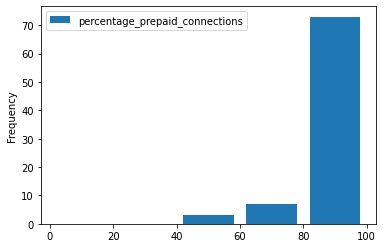

In [69]:
data[["percentage_prepaid_connections"]].plot(kind="hist",bins=[0,20,40,60,80,100],rwidth=0.8)

##### Distribusi frekuensi percentage_contract_connections

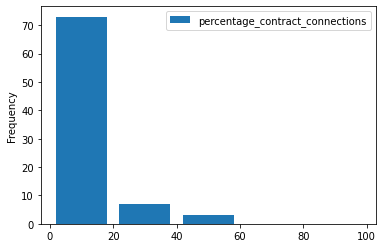

In [70]:
data[["percentage_contract_connections"]].plot(kind="hist",bins=[0,20,40,60,80,100],rwidth=0.8)

##### Distribusi frekuensi percentage_2G_connections

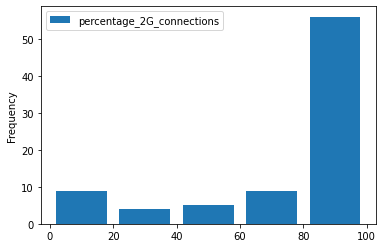

In [71]:
data[["percentage_2G_connections"]].plot(kind="hist",bins=[0,20,40,60,80,100],rwidth=0.8)

##### Distribusi frekuensi percentage_3G_connections

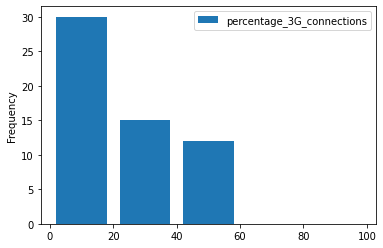

In [72]:
data[["percentage_3G_connections"]].plot(kind="hist",bins=[0,20,40,60,80,100],rwidth=0.8)

##### Distribusi frekuensi percentage_4G_connections

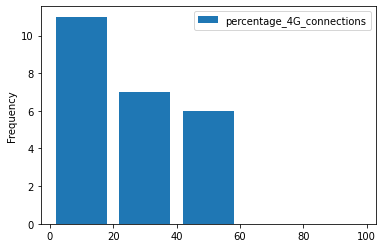

In [73]:
data[["percentage_4G_connections"]].plot(kind="hist",bins=[0,20,40,60,80,100],rwidth=0.8)

## Data Visualization

### Perbandingan Kategori

#### Menyiapkan Data

In [74]:
yeardata = data.groupby("year")["year","percentage_prepaid_connections","percentage_contract_connections","percentage_2G_connections","percentage_3G_connections","percentage_4G_connections"].mean()
yeardata

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,year,percentage_prepaid_connections,percentage_contract_connections,percentage_2G_connections,percentage_3G_connections,percentage_4G_connections
year,,,,,,
2000,2000,56.8700,43.1300,100.000000,NaN,NaN
2001,2001,67.7525,32.2475,100.000000,NaN,NaN
2002,2002,79.9400,20.0600,100.000000,NaN,NaN
2003,2003,87.8275,12.1725,100.000000,NaN,NaN
2004,2004,90.8925,9.1075,100.000000,NaN,NaN
2005,2005,93.3875,6.6125,100.000000,NaN,NaN
2006,2006,94.8175,5.1825,99.935000,0.130000,NaN
2007,2007,95.7800,4.2200,99.222500,0.777500,NaN
2008,2008,96.6350,3.3650,97.945000,2.055000,NaN


#### Perbandingan kategori di tahun 2015

In [75]:
yeardata2015 = yeardata.loc[yeardata["year"] == 2015]
yeardata2015

,year,percentage_prepaid_connections,percentage_contract_connections,percentage_2G_connections,percentage_3G_connections,percentage_4G_connections
year,,,,,,
2015,2015,97.8375,2.1625,69.11,30.175,0.7175


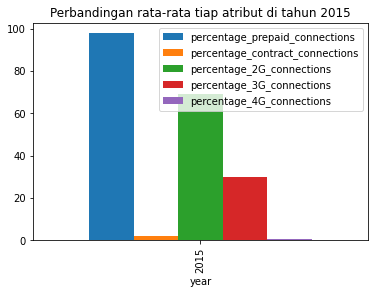

In [76]:
yeardata2015.plot(kind="bar", y=["percentage_prepaid_connections","percentage_contract_connections","percentage_2G_connections","percentage_3G_connections","percentage_4G_connections"], width=1, title="Perbandingan rata-rata tiap atribut di tahun 2015")

#### Perbandingan kategori di tahun 2017

In [77]:
yeardata2017 = yeardata.loc[yeardata["year"] == 2017]
yeardata2017

,year,percentage_prepaid_connections,percentage_contract_connections,percentage_2G_connections,percentage_3G_connections,percentage_4G_connections
year,,,,,,
2017,2017,97.5875,2.4125,41.165,39.795,19.04


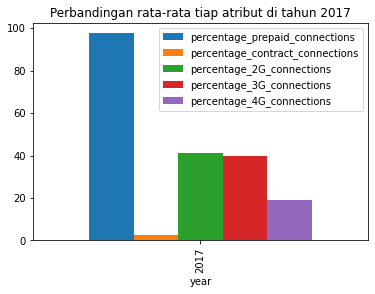

In [78]:
yeardata2017.plot(kind="bar", y=["percentage_prepaid_connections","percentage_contract_connections","percentage_2G_connections","percentage_3G_connections","percentage_4G_connections"], width=1, title="Perbandingan rata-rata tiap atribut di tahun 2017")

#### Perbandingan kategori di tahun 2020

In [79]:
yeardata2020 = yeardata.loc[yeardata["year"] == 2020]
yeardata2020

,year,percentage_prepaid_connections,percentage_contract_connections,percentage_2G_connections,percentage_3G_connections,percentage_4G_connections
year,,,,,,
2020,2020,96.14,3.86,3.486667,42.346667,54.166667


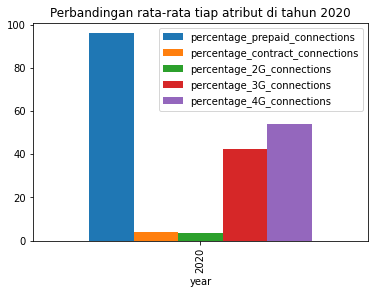

In [80]:
yeardata2020.plot(kind="bar", y=["percentage_prepaid_connections","percentage_contract_connections","percentage_2G_connections","percentage_3G_connections","percentage_4G_connections"], width=1, title="Perbandingan rata-rata tiap atribut di tahun 2020")

### Perubahan Data Tiap Waktu

#### Perubahan percentage_prepaid_connetions tiap tahun

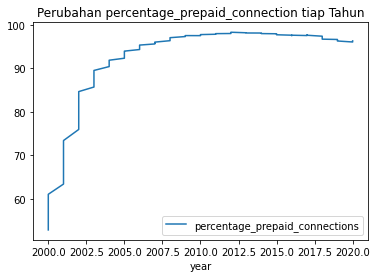

In [81]:
data.plot(kind="line", x="year", y="percentage_prepaid_connections", title="Perubahan percentage_prepaid_connection tiap Tahun")

#### Perubahan percentage_contract_connetions tiap tahun

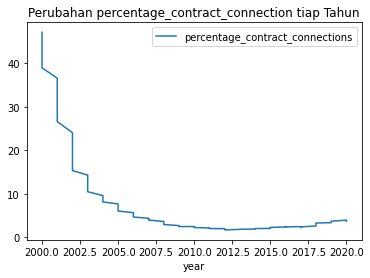

In [82]:
data.plot(kind="line", x="year", y="percentage_contract_connections", title="Perubahan percentage_contract_connection tiap Tahun")

#### Perubahan percentage_2G_connetions tiap tahun

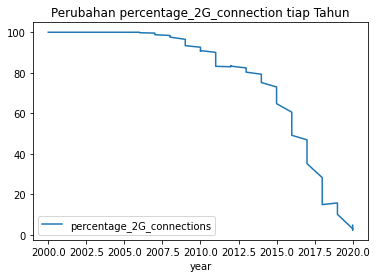

In [83]:
data.plot(kind="line", x="year", y="percentage_2G_connections", title="Perubahan percentage_2G_connection tiap Tahun")

#### Perubahan percentage_3G_connetions tiap tahun

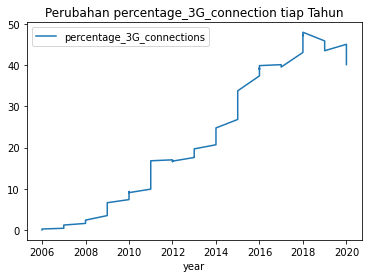

In [84]:
data.plot(kind="line", x="year", y="percentage_3G_connections", title="Perubahan percentage_3G_connection tiap Tahun")

#### Perubahan percentage_4G_connetions tiap tahun

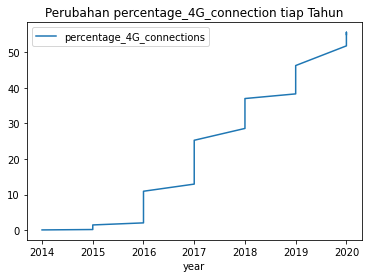

In [85]:
data.plot(kind="line", x="year", y="percentage_4G_connections", title="Perubahan percentage_4G_connection tiap Tahun")

## Korelasi Data

#### Korelasi antara percentage_prepaid_connection dan percentage_contract_connections

Koefisien Korelasi

In [86]:
data["percentage_prepaid_connections"].corr(data["percentage_contract_connections"])

-1.0

*percentage_prepaid_connections dengan percentage_contract_connections* **berkorelasi terbalik**

Menvisualisasikan korelasi antara kedua atribut dengan menggabungkan 2 plot garis dalam 1 grafik

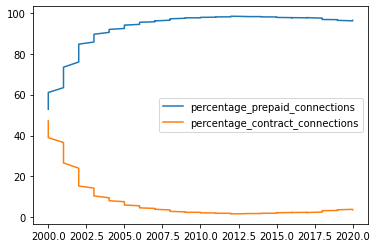

In [87]:
plt.plot(data["year"], data["percentage_prepaid_connections"], label="percentage_prepaid_connections")
plt.plot(data["year"], data["percentage_contract_connections"], label="percentage_contract_connections")
plt.legend(loc="best")

Menvisualisasikan korelasi antara kedua atribut dengan scatter plot

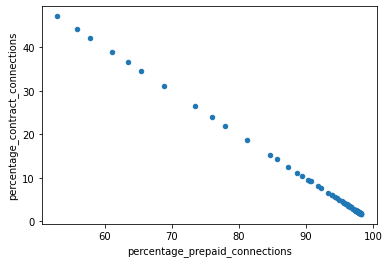

In [88]:
data.plot(kind="scatter", x="percentage_prepaid_connections", y="percentage_contract_connections")

*terbukti dengan visualisasi grafik bahwa percentage_prepaid_connections dengan percentage_contract_connections* **berkorelasi terbalik**

#### Korelasi antara percentage_prepaid_connection dan percentage_2G_connections

Koefisien Korelasi

In [89]:
data["percentage_prepaid_connections"].corr(data["percentage_2G_connections"])

-0.3483095366401773

*Karena koefisien korelasi mendekati 0, maka percentage_prepaid_connections dengan percentage_2G_connections* **tidak berkorelasi** 

Menvisualisasikan korelasi antara kedua atribut dengan menggabungkan 2 plot garis dalam 1 grafik

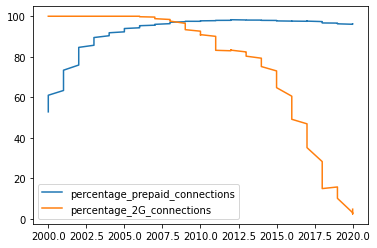

In [90]:
plt.plot(data["year"], data["percentage_prepaid_connections"], label="percentage_prepaid_connections")
plt.plot(data["year"], data["percentage_2G_connections"], label="percentage_2G_connections")
plt.legend(loc="best") 

Menvisualisasikan korelasi antara kedua atribut dengan scatter plot

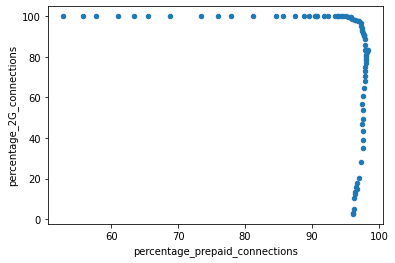

In [91]:
data.plot(kind="scatter", x="percentage_prepaid_connections", y="percentage_2G_connections")

*terbukti dengan visualisasi grafik bahwa percentage_prepaid_connections dengan percentage_2G_connections* **tidak berkorelasi**

#### Korelasi antara percentage_contract_connection dan percentage_2G_connections

Koefisien Korelasi

In [92]:
data["percentage_contract_connections"].corr(data["percentage_2G_connections"])

0.3483095366401773

*Karena koefisien korelasi mendekati 0, maka percentage_contract_connections dengan percentage_2G_connections* **tidak berkorelasi**

Menvisualisasikan korelasi antara kedua atribut dengan menggabungkan 2 plot garis dalam 1 grafik

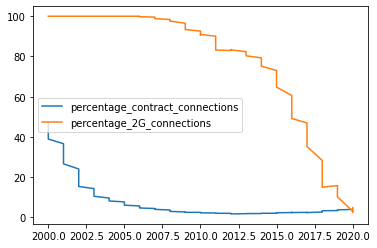

In [93]:
plt.plot(data["year"], data["percentage_contract_connections"], label="percentage_contract_connections")
plt.plot(data["year"], data["percentage_2G_connections"], label="percentage_2G_connections")
plt.legend(loc="best")

Menvisualisasikan korelasi antara kedua atribut dengan scatter plot

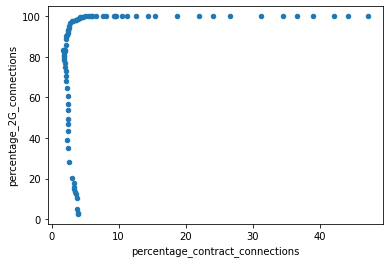

In [94]:
data.plot(kind="scatter", x="percentage_contract_connections", y="percentage_2G_connections")

*terbukti dengan visualisasi grafik bahwa percentage_contract_connections dengan percentage_2G_connections* **tidak berkorelasi**

#### Korelasi antara percentage_prepaid_connection dan percentage_3G_connections

Koefisien Korelasi

In [95]:
data["percentage_prepaid_connections"].corr(data["percentage_3G_connections"])

0.09409269204151662

*Karena koefisien korelasi mendekati 0, maka percentage_prepaid_connections dengan percentage_3G_connections* **tidak berkorelasi**

Menvisualisasikan korelasi antara kedua atribut dengan menggabungkan 2 plot garis dalam 1 grafik

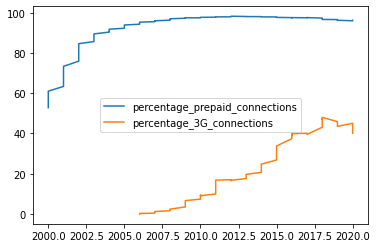

In [96]:
plt.plot(data["year"], data["percentage_prepaid_connections"], label="percentage_prepaid_connections")
plt.plot(data["year"], data["percentage_3G_connections"], label="percentage_3G_connections")
plt.legend(loc="best")

Menvisualisasikan korelasi antara kedua atribut dengan scatter plot

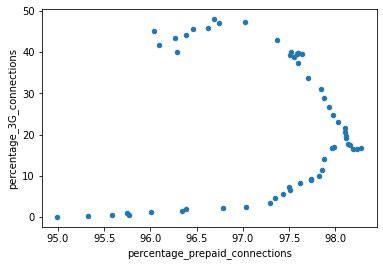

In [97]:
data.plot(kind="scatter", x="percentage_prepaid_connections", y="percentage_3G_connections")

*terbukti dengan visualisasi grafik bahwa percentage_prepaid_connections dengan percentage_3G_connections* **tidak berkorelasi**

#### Korelasi antara percentage_contract_connection dan percentage_3G_connections

Koefisien Korelasi

In [98]:
data["percentage_contract_connections"].corr(data["percentage_3G_connections"])

-0.09409269204151641

*Karena koefisien korelasi mendekati 0, maka percentage_contract_connections dengan percentage_3G_connections* **tidak berkorelasi**

Menvisualisasikan korelasi antara kedua atribut dengan menggabungkan 2 plot garis dalam 1 grafik

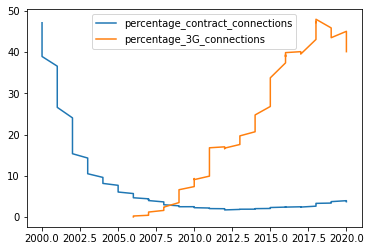

In [99]:
plt.plot(data["year"], data["percentage_contract_connections"], label="percentage_contract_connections")
plt.plot(data["year"], data["percentage_3G_connections"], label="percentage_3G_connections")
plt.legend(loc="best")

Menvisualisasikan korelasi antara kedua atribut dengan scatter plot

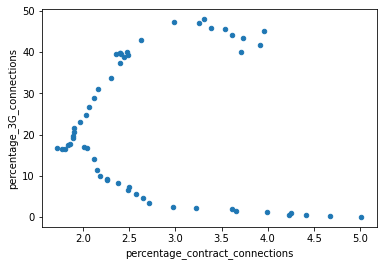

In [100]:
data.plot(kind="scatter", x="percentage_contract_connections", y="percentage_3G_connections")

*terbukti dengan visualisasi grafik bahwa percentage_contract_connections dengan percentage_3G_connections* **tidak berkorelasi**

#### Korelasi antara percentage_prepaid_connection dan percentage_4G_connections

Koefisien Korelasi

In [101]:
data["percentage_prepaid_connections"].corr(data["percentage_4G_connections"])

-0.9503097007846069

*Karena koefisien korelasi mendekati -1, maka percentage_prepaid_connections dengan percentage_4G_connections* **berkorelasi terbalik**

Menvisualisasikan korelasi antara kedua atribut dengan menggabungkan 2 plot garis dalam 1 grafik

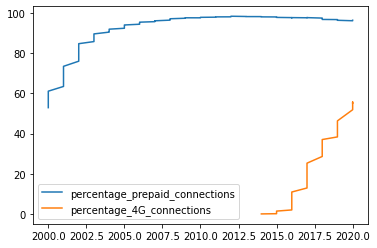

In [102]:
plt.plot(data["year"], data["percentage_prepaid_connections"], label="percentage_prepaid_connections")
plt.plot(data["year"], data["percentage_4G_connections"], label="percentage_4G_connections")
plt.legend(loc="best")

Menvisualisasikan korelasi antara kedua atribut dengan scatter plot

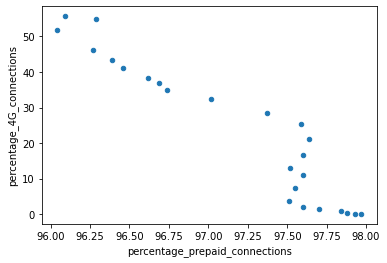

In [103]:
data.plot(kind="scatter", x="percentage_prepaid_connections", y="percentage_4G_connections")

*terbukti dengan visualisasi grafik bahwa percentage_prepaid_connections dengan percentage_4G_connections* **berkorelasi terbalik**

#### Korelasi antara percentage_contract_connection dan percentage_4G_connections

Koefisien Korelasi

In [104]:
data["percentage_contract_connections"].corr(data["percentage_4G_connections"])

0.9503097007846074

*Karena koefisien korelasi mendekati 1, maka percentage_prepaid_connections dengan percentage_4G_connections* **berkorelasi lurus**

Menvisualisasikan korelasi antara kedua atribut dengan menggabungkan 2 plot garis dalam 1 grafik

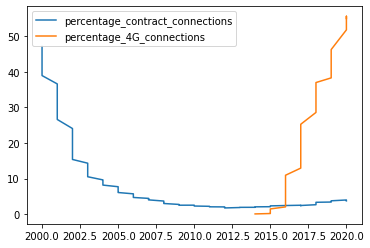

In [105]:
plt.plot(data["year"], data["percentage_contract_connections"], label="percentage_contract_connections")
plt.plot(data["year"], data["percentage_4G_connections"], label="percentage_4G_connections")
plt.legend(loc="best")

Menvisualisasikan korelasi antara kedua atribut dengan scatter plot

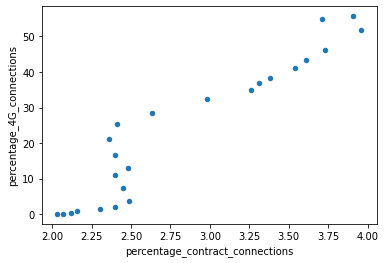

In [106]:
data.plot(kind="scatter", x="percentage_contract_connections", y="percentage_4G_connections")

*terbukti dengan visualisasi grafik bahwa percentage_contract_connections dengan percentage_4G_connections* **berkorelasi lurus**

#### Korelasi antara percentage_2G_connection dan percentage_3G_connections

Koefisien Korelasi

In [107]:
data["percentage_2G_connections"].corr(data["percentage_3G_connections"])

-0.9342043135533118

*Karena koefisien korelasi mendekati -1, maka percentage_2G_connections dengan percentage_3G_connections* **berkorelasi terbalik**

Menvisualisasikan korelasi antara kedua atribut dengan menggabungkan 2 plot garis dalam 1 grafik

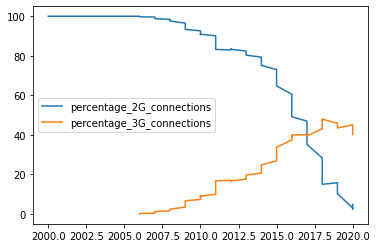

In [108]:
plt.plot(data["year"], data["percentage_2G_connections"], label="percentage_2G_connections")
plt.plot(data["year"], data["percentage_3G_connections"], label="percentage_3G_connections")
plt.legend(loc="best")

Menvisualisasikan korelasi antara kedua atribut dengan scatter plot

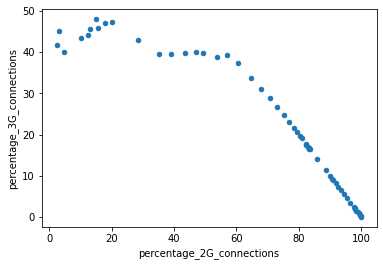

In [109]:
data.plot(kind="scatter", x="percentage_2G_connections", y="percentage_3G_connections")

*terbukti dengan visualisasi grafik bahwa percentage_2G_connections dengan percentage_3G_connections* **berkorelasi terbalik**

#### Korelasi antara percentage_2G_connection dan percentage_4G_connections

Koefisien Korelasi

In [110]:
data["percentage_2G_connections"].corr(data["percentage_4G_connections"])

-0.9850883595052955

*Karena koefisien korelasi mendekati -1, maka percentage_2G_connections dengan percentage_4G_connections* **berkorelasi terbalik**

Menvisualisasikan korelasi antara kedua atribut dengan menggabungkan 2 plot garis dalam 1 grafik

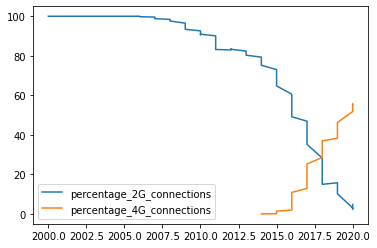

In [111]:
plt.plot(data["year"], data["percentage_2G_connections"], label="percentage_2G_connections")
plt.plot(data["year"], data["percentage_4G_connections"], label="percentage_4G_connections")
plt.legend(loc="best")

Menvisualisasikan korelasi antara kedua atribut dengan scatter plot

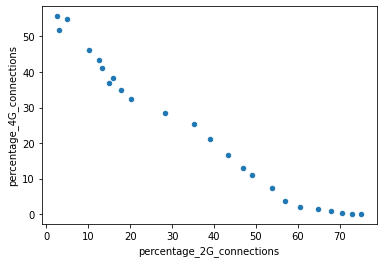

In [112]:
data.plot(kind="scatter", x="percentage_2G_connections", y="percentage_4G_connections")

*terbukti dengan visualisasi grafik bahwa percentage_2G_connections dengan percentage_4G_connections* **berkorelasi terbalik**

#### Korelasi antara percentage_3G_connection dan percentage_4G_connections

Koefisien Korelasi

In [113]:
data["percentage_3G_connections"].corr(data["percentage_4G_connections"])

0.751288171028777

*Karena koefisien korelasi mendekati 1, maka percentage_3G_connections dengan percentage_4G_connections* **berkorelasi lurus**

Menvisualisasikan korelasi antara kedua atribut dengan menggabungkan 2 plot garis dalam 1 grafik

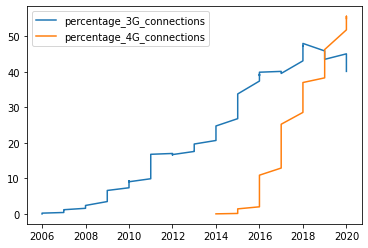

In [114]:
plt.plot(data["year"], data["percentage_3G_connections"], label="percentage_3G_connections")
plt.plot(data["year"], data["percentage_4G_connections"], label="percentage_4G_connections")
plt.legend(loc="best")

Menvisualisasikan korelasi antara kedua atribut dengan scatter plot

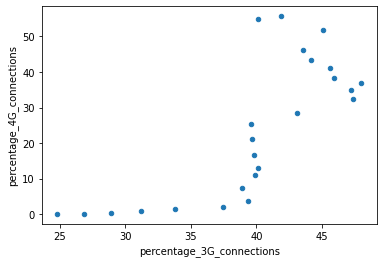

In [115]:
data.plot(kind="scatter", x="percentage_3G_connections", y="percentage_4G_connections")

*terbukti dengan visualisasi grafik bahwa percentage_3G_connections dengan percentage_4G_connections* **berkorelasi lurus**

# # E. Insight

## Informasi dari Statistik

### Sampel Data

### Statistik Deskriptif

## Informasi dari Data Visualization

### Perbandingan Kategori

### Perubahan Data Tiap Waktu

## Informasi dari Korelasi Data